#  Customer Retail Purchase Analysis & Prediction (2023)

##  Problem Statement
Using the *Customer Retail Purchase Data (2023)*, we aim to build a **Linear Regression model** that predicts the **Total Amount Spent** by a customer during a transaction. The model will use customer demographics and purchase behavior to make predictions.

---

## Objective
- Predict the `Total Amount` using various features such as:
  - Gender
  - Age
  - Product Category
  - Quantity
  - Price per Unit

---

##  Dataset Description

| Column Name       | Description                                                        |
|-------------------|--------------------------------------------------------------------|
| `Date`            | Date of the transaction                                            |
| `Gender`          | Gender of the customer                                             |
| `Age`             | Age of the customer                                                |
| `Product Category`| Category of the purchased item (e.g.,Beauty,Clothing,Electronics)  |
| `Quantity`        | Number of units purchased                                          |
| `Price per Unit`  | Cost of one unit of the item                                       |
| `Total Amount`    | Total spending = Quantity × Price per Unit                         |

---

##  Features and Label

- **Features (X)**:
  - `Gender` (encoded: Male = 0, Female = 1)
  - `Age`
  - `Product Category` (encoded: Beauty = 0, Clothing = 1, Electronics = 2)
  - `Quantity`
  - `Price per Unit`

- **Label (y)**:
  - `Total Amount`

---

##  Step 1: Data Cleaning & Preprocessing

-  Check for **null/missing values**
-  Check for **duplicate entries**
-  Detect and handle **outliers**

---

##  Step 2: Exploratory Data Analysis (EDA)

### Distribution Plots
- Age distribution
- Price per Unit distribution
- Quantity and Total Amount distribution

###  Gender-wise Analysis
- Total Amount by Gender
- Average Quantity purchased by Gender

###  Category Trends
- Most popular Product Categories
- Monthly or seasonal trends (extract from Date)

---

##  Step 3: Feature Scaling

- Apply `StandardScaler` to scale numerical features:
  - Age
  - Quantity
  - Price per Unit

---

##  Step 4: Train-Test Split

- Split data into:
  - Training set (e.g., 80%)
  - Testing set (e.g., 20%)
- Use `train_test_split` with `random_state=42`

---

##  Step 5: Linear Regression Model

- Fit the **Linear Regression** model on training data
- Predict on test set

---

##  Step 6: Model Evaluation

Calculate and compare the following metrics:
- 🔹 `R² Score`
- 🔹 `Mean Absolute Error (MAE)`
- 🔹 `Mean Squared Error (MSE)`
- 🔹 `Root Mean Squared Error (RMSE)`

---

##  Step 7: Regularization for Overfitting Check

###  Lasso Regression
- Use L1 regularization
- Evaluate performance and feature selection

###  Ridge Regression
- Use L2 regularization
- Compare training/testing performance

---

##  Step 8: Model Comparison

| Model Type       | Train R² | Test R² | MAE  | MSE  | RMSE |
|------------------|----------|---------|------|------|------|
| Linear Regression|          |         |      |      |      |
| Lasso Regression |          |         |      |      |      |
| Ridge Regression |          |         |      |      |      |

- Comment on whether the model is overfitting or underfitting based on results

---

## Conclusion

- Summary of insights from the data
- Final selected model and performance
- Suggestions for improvement or future work (e.g., more features, advanced models like XGBoost, time series forecasting)


##  Step 1: Data Cleaning & Preprocessing

-  Check for **null/missing values**
-  Check for **duplicate entries**
-  Detect and handle **outliers**


In [53]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

# Import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load dataset(csv file)
df=pd.read_csv("sales.csv")

In [3]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,0,0,24-11-2023,0,34,0,3,50,150
1,1,1,27-02-2023,1,26,1,2,500,1000
2,2,2,13-01-2023,0,50,2,1,30,30
3,3,3,21-05-2023,0,37,1,1,500,500
4,4,4,06-05-2023,0,30,0,2,50,100


In [4]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,499.500000,0.51000,41.39200,1.035000,2.514000,179.890000,456.000000
std,288.819436,288.819436,0.50015,13.68143,0.805247,1.132734,189.681356,559.997632
min,0.000000,0.000000,0.00000,18.00000,0.000000,1.000000,25.000000,25.000000
25%,249.750000,249.750000,0.00000,29.00000,0.000000,1.000000,30.000000,60.000000
50%,499.500000,499.500000,1.00000,42.00000,1.000000,3.000000,50.000000,135.000000
75%,749.250000,749.250000,1.00000,53.00000,2.000000,4.000000,300.000000,900.000000
max,999.000000,999.000000,1.00000,64.00000,2.000000,4.000000,500.000000,2000.000000


In [5]:
# Drop unwanted columns
df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)
df.head()

,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,24-11-2023,0,34,0,3,50,150
1,27-02-2023,1,26,1,2,500,1000
2,13-01-2023,0,50,2,1,30,30
3,21-05-2023,0,37,1,1,500,500
4,06-05-2023,0,30,0,2,50,100


In [6]:
#Check null/missing values

df['Product Category']=df['Product Category'].fillna(df['Product Category'].mode()[0])
df['Price per Unit']=df['Price per Unit'].fillna(df['Price per Unit'].mean())
df['Quantity']=df['Quantity'].fillna(df['Quantity'].mean())

In [7]:
#Check for duplicates
duplicates = df.duplicated()
df[duplicates]

,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount


In [8]:
df[df.duplicated(keep=False)]  # shows all duplicate rows


,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount


In [9]:
df.duplicated().sum()


0

In [10]:
#Detect and handle **outliers**
Q1 = df['Total Amount'].quantile(0.25)
print('Q1 (25th percentile)',Q1)
Q3 = df['Total Amount'].quantile(0.75)
print('Q3 (75th percentile)',Q3)
IQR = Q3 - Q1
print('IQR',IQR)

# Boolean mask for outliers
outliers = (df['Total Amount'] < (Q1 - 1.5 * IQR)) | (df['Total Amount'] > (Q3 + 1.5 * IQR))

Q1 (25th percentile) 60.0
Q3 (75th percentile) 900.0
IQR 840.0


In [11]:
# Find lower bound = Q1 - 1.5 × IQR

lower_bound=Q1-(1.5 * IQR)
print('Lower bound',lower_bound)

# 4- Find upper bound = Q3 + 1.5 × IQR
upper_bound=Q3 + (1.5 * IQR)
print("Upper bound ",upper_bound)

Lower bound -1200.0
Upper bound  2160.0


In [12]:
def find_outliers_iqr(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [13]:
find_outliers_iqr(df,column)

NameError: name 'columns' is not defined

##  Step 2: Exploratory Data Analysis (EDA)

### Distribution Plots
###  Gender-wise Analysis
- Total Amount by Gender
- Average Quantity purchased by Gender

###  Category Trends
- Most popular Product Categories
- Monthly or seasonal trends (extract from Date)



### Distribution Plots

In [ ]:
# Age distribution
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [ ]:
# Price per Unit distribution
sns.histplot(df['Price per Unit'], kde=True, bins=30)
plt.title('Price per Unit Distribution')
plt.xlabel('Price per Unit')
plt.show()


In [ ]:
# Quantity and Total Amount distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['Quantity'], kde=True, ax=axes[0])
axes[0].set_title('Quantity Distribution')

sns.histplot(df['Total Amount'], kde=True, ax=axes[1])
axes[1].set_title('Total Amount Distribution')

plt.tight_layout()
plt.show()


###  Gender-wise Analysis

In [ ]:
# Total Amount by Gender
sns.barplot(data=df, x='Gender', y='Total Amount', estimator=sum)
plt.title('Total Amount by Gender')
plt.ylabel('Total Amount')
plt.show()


In [ ]:
# Average Quantity purchased by Gender
sns.barplot(data=df, x='Gender', y='Quantity', estimator='mean')
plt.title('Average Quantity by Gender')
plt.ylabel('Average Quantity')
plt.show()


###  Category Trends

In [ ]:
# Most popular Product Categories
top_categories = df['Product Category'].value_counts().head(100)

sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title('Top 10 Product Categories')
plt.xlabel('Number of Purchases')
plt.ylabel('Category')
plt.show()


In [ ]:
# Monthly or seasonal trends (extract from Date)
df['Date'] = pd.to_datetime(df['Date']) 
df['Month'] = df['Date'].dt.to_period('M')

monthly_sales = df.groupby('Month')['Total Amount'].sum().reset_index()

sns.lineplot(data=monthly_sales, x='Month', y='Total Amount')
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)
plt.ylabel('Total Amount')
plt.show()

In [ ]:
# Monthly or seasonal trends (extract from Date)
df['Date'] = pd.to_datetime(df['Date']) 
#df['Month'] = df['Date'].dt.to_period('M')

monthly_sales = df.groupby('Date')['Total Amount'].sum().reset_index()

sns.lineplot(data=monthly_sales, x='Date', y='Total Amount')
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)
plt.ylabel('Total Amount')
plt.show()

##  Step 3: Feature Scaling

- Apply `StandardScaler` to scale numerical features:
  - Age
  - Quantity
  - Price per Unit


In [14]:

if 'Price per Unit' not in df.columns:
    df['Price per Unit'] = df['Total Amount'] / df['Quantity']

# Select numerical columns to scale
features_to_scale = ['Age', 'Quantity', 'Price per Unit']
scaler = StandardScaler()

# Fit and transform the data
df_scaled = df.copy()
df_scaled[features_to_scale] = scaler.fit_transform(df[features_to_scale])

print(df_scaled[features_to_scale].head())


        Age  Quantity  Price per Unit
0 -0.540565  0.429265       -0.685123
1 -1.125592 -0.453996        1.688464
2  0.629489 -1.337258       -0.790615
3 -0.321180 -1.337258        1.688464
4 -0.833078 -0.453996       -0.685123


ValueError: could not convert string to float: '24-11-2023'

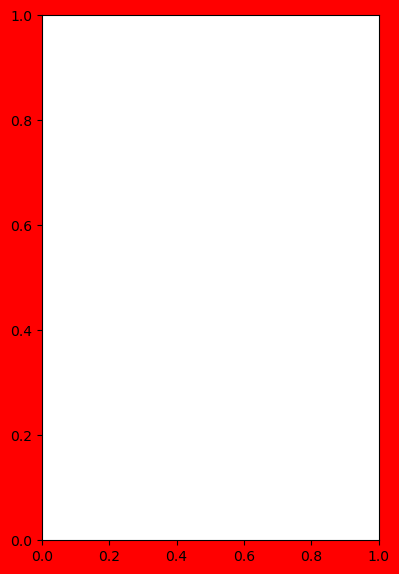

In [15]:
plt.figure(figsize=(20,15),facecolor='red')
plotnumber=1
for column in df:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.tight_layout()

In [26]:
#Divide dataset into Features and label
y=df['Total Amount']
x=df.drop(columns=['Total Amount'])

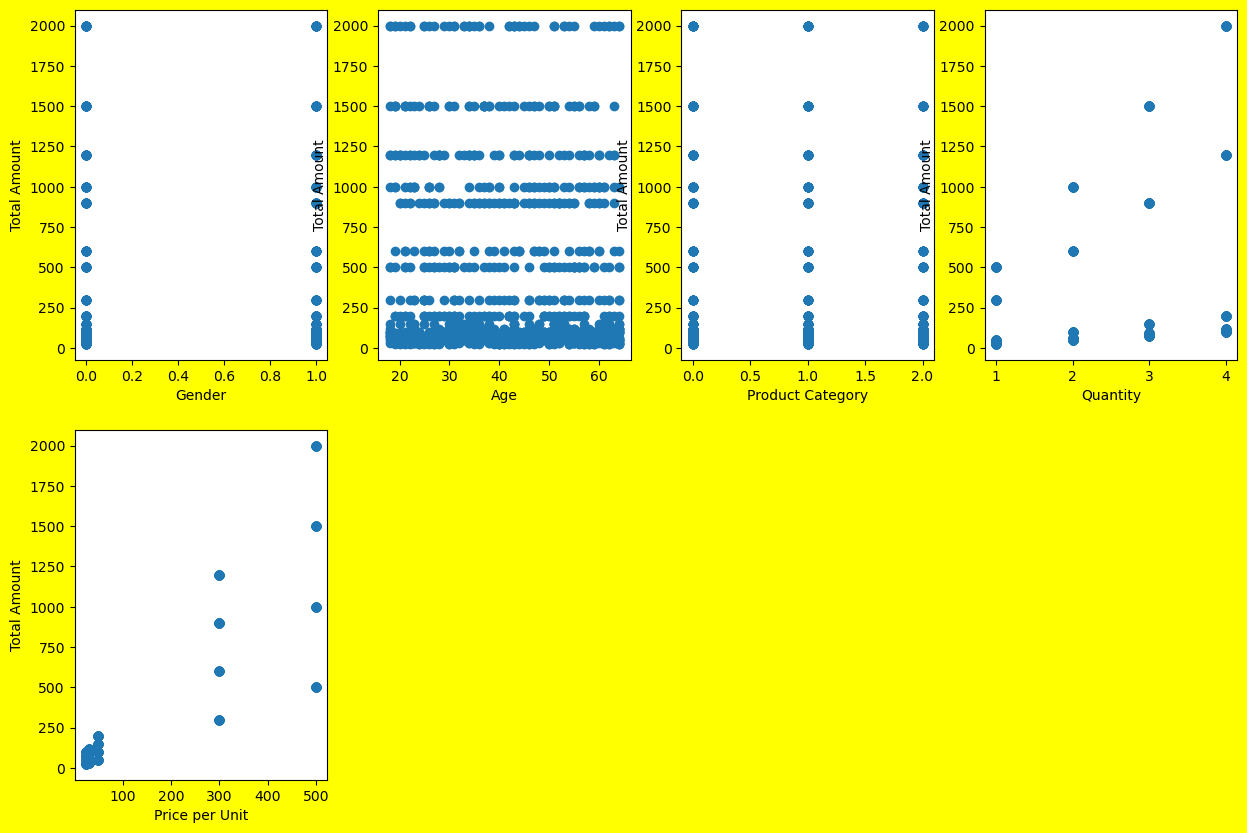

In [23]:
#Visualizing  relationship

plt.figure(figsize=(15,10),facecolor='yellow')
plotnumber=1
for column in x:
    if plotnumber <=8:
        ax=plt.subplot(2,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column , fontsize=10)
        plt.ylabel('Total Amount',fontsize=10)
    plotnumber +=1
plt.show()

In [27]:
#Data Scaling Fomula z =(x-mean)/std 
scaler =StandardScaler()
x_scaled = scaler.fit_transform(x)

ValueError: could not convert string to float: '24-11-2023'

In [28]:
x_scaled

array([[-1.02020406, -0.54056476, -1.28596236,  0.42926498, -0.68512265],
       [ 0.98019606, -1.12559156, -0.04348665, -0.45399629,  1.68846418],
       [-1.02020406,  0.62948884,  1.19898906, -1.33725757, -0.7906154 ],
       ...,
       [ 0.98019606, -1.34497661, -1.28596236,  1.31252625, -0.81698859],
       [ 0.98019606, -0.39430806,  1.19898906,  0.42926498, -0.68512265],
       [-1.02020406,  0.41010379,  1.19898906,  1.31252625, -0.7906154 ]])

##  Step 4: Train-Test Split

In [ ]:
- Split data into:
  - Training set (e.g., 80%)
  - Testing set (e.g., 20%)
- Use `train_test_split` with `random_state=42`


In [29]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=42)
y_train.head()

29     900
535    120
695    200
557     25
836     90
Name: Total Amount, dtype: int64

In [43]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(800, 5) (800,)
(200, 5) (200,)


##  Step 5: Linear Regression Model

In [37]:
# Fit the **Linear Regression** model on training data
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [38]:
# Predict on test set
regression.score(x_test,y_test)

0.8569204950413811

In [44]:
#Adjusted R2
regression.score(x_train,y_train)


0.8544581758105761

##  Step 6: Model Evaluation

Calculate and compare the following metrics:
- 🔹 `R² Score`
- 🔹 `Mean Absolute Error (MAE)`
- 🔹 `Mean Squared Error (MSE)`
- 🔹 `Root Mean Squared Error (RMSE)`


In [49]:
df = df[df['Price per Unit'] < 100]
X = df.drop('Total Amount', axis=1)
y = df['Total Amount']

In [50]:
y_pred=regression.predict(x_test)

In [52]:
# Calculate metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R² Score:", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


R² Score: 0.8569204950413811
Mean Absolute Error (MAE): 173.03112272794675
Mean Squared Error (MSE): 41883.547234438716
Root Mean Squared Error (RMSE): 204.65470244887783


##  Step 7: Regularization for Overfitting Check

###  Lasso Regression


In [54]:
# Use L1 regularization
lasscv=LassoCV(alphas = None , max_iter =100)
lasscv.fit(x_train,y_train)
# Evaluate performance and feature selection


LassoCV(max_iter=100)

In [56]:
#best alpha paremetere
alpha=lasscv.alpha_
alpha

2.5654848067534775

In [57]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=2.5654848067534775)

In [58]:
lasso_reg.score(x_test,y_test)

0.8571135476998342

In [67]:
# Predict on test data
y_pred_lasso = lasso_reg.predict(x_test)


In [68]:
# Calculate metrics
r2 = r2_score(y_test, y_pred_lasso)
mae = mean_absolute_error(y_test, y_pred_lasso)
mse = mean_squared_error(y_test, y_pred_lasso)
rmse = np.sqrt(mse)

print("R² Score:", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


R² Score: 0.8571135476998342
Mean Absolute Error (MAE): 172.79115325870032
Mean Squared Error (MSE): 41827.03508658504
Root Mean Squared Error (RMSE): 204.51658878092272


In [ ]:
# so here both give the almost same result means over model is not overfitted

###  Ridge Regression

In [60]:
# Use L2 regularization
# Ridge will return best alpha and coefficients after performing 10 Cross validation
ridgecv=RidgeCV(alphas =np.arange(0.001,0.1,0.01))
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]))

In [61]:
ridgecv.alpha_

0.09099999999999998

In [ ]:
# Compare training/testing performance

In [62]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.09099999999999998)

In [63]:
ridge_model.score(x_test,y_test)

0.8569195315708915

In [64]:
ridge_model.score(x_train,y_train)

0.8544581653873486

In [69]:
# Predict on test data
y_pred_ridge = ridge_model.predict(x_test)


In [75]:
# Calculate metrics
testr2 = r2_score(y_test, y_pred_ridge)
mae = mean_absolute_error(y_test, y_pred_ridge)
mse = mean_squared_error(y_test, y_pred_ridge)
rmse = np.sqrt(mse)

print("R² Score(Test):", testr2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


R² Score(Test): 0.8569195315708915
Mean Absolute Error (MAE): 173.03018739564533
Mean Squared Error (MSE): 41883.829270372335
Root Mean Squared Error (RMSE): 204.65539150086502


In [ ]:
##  Step 8: Model Comparison

| Model Type       | Train R² | Test R² | MAE  | MSE  | RMSE |
|------------------|----------|---------|------|------|------|
| Linear Regression|          |         |      |      |      |
| Lasso Regression |          |         |      |      |      |
| Ridge Regression |          |         |      |      |      |

- Comment on whether the model is overfitting or underfitting based on results

---

## Conclusion

- Summary of insights from the data
- Final selected model and performance
- Suggestions for improvement or future work (e.g., more features, advanced models like XGBoost, time series forecasting)


In [77]:
print("linear Regression")
# Calculate metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R² Score:", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


print("lasso Regression")
# Calculate metrics
r2 = r2_score(y_test, y_pred_lasso)
mae = mean_absolute_error(y_test, y_pred_lasso)
mse = mean_squared_error(y_test, y_pred_lasso)
rmse = np.sqrt(mse)

print("R² Score:", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
 
print("Ridge Regression")
# Calculate metrics
testr2 = r2_score(y_test, y_pred_ridge)
mae = mean_absolute_error(y_test, y_pred_ridge)
mse = mean_squared_error(y_test, y_pred_ridge)
rmse = np.sqrt(mse)

print("R² Score(Test):", testr2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)



linear Regression
R² Score: 0.8569204950413811
Mean Absolute Error (MAE): 173.03112272794675
Mean Squared Error (MSE): 41883.547234438716
Root Mean Squared Error (RMSE): 204.65470244887783
lasso Regression
R² Score: 0.8571135476998342
Mean Absolute Error (MAE): 172.79115325870032
Mean Squared Error (MSE): 41827.03508658504
Root Mean Squared Error (RMSE): 204.51658878092272
Ridge Regression
R² Score(Test): 0.8569195315708915
Mean Absolute Error (MAE): 173.03018739564533
Mean Squared Error (MSE): 41883.829270372335
Root Mean Squared Error (RMSE): 204.65539150086502


In [ ]:
# so  we can coclide that we don't need to drop any coloumn and model is not overfitting/underfitting .it give the best output